# Show 3D FFT Results for Simulated Morphologies

Created by Z.Sun on Apr 11 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = np.load('44D-A4B7_20.dump.npy') # change filename here, generated by `DUMPvoxelization.py`
fd= np.fft.fftshift(np.abs(np.fft.fftn(d)))
shape = fd.shape
center= [i//2 for i in shape]
print(' size:', shape, '\n', 'center:', center, '\n', 'central maximum:', fd[tuple(center)])
# fd[center] is mathematically equal to sum(d)

 size: (32, 32, 32) 
 center: [16, 16, 16] 
 central maximum: 3280.0


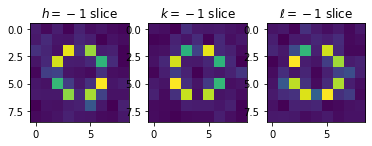

In [3]:
%matplotlib inline
plt.subplot(131)
plt.imshow(fd[center[0]-1, center[1]-4:center[1]+5, center[2]-4:center[2]+5])
plt.title('$h=-1$ slice')
plt.subplot(132)
plt.imshow(fd[center[0]-4:center[0]+5, center[1]-1, center[2]-4:center[2]+5])
plt.title('$k=-1$ slice')
plt.subplot(133)
plt.imshow(fd[center[0]-4:center[0]+5, center[1]-4:center[1]+5, center[2]-1])
plt.title('$\\ell=-1$ slice')
plt.show()

In [4]:
xyz = np.indices((fd.shape))
for i in range(3):
    xyz[i] -= center[i]
rsq = np.sum(xyz**2, axis=0)

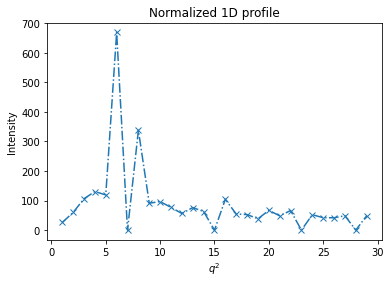

In [5]:
tbin = np.bincount(rsq.ravel(), fd.ravel())
tbin /= np.bincount(rsq.ravel()) + np.finfo(float).eps # avoid zero divider
plt.plot(np.arange(1, 30),tbin[1:30], '-.x')
plt.xlabel('$q^2$')
plt.ylabel('Intensity')
plt.title('Normalized 1D profile')
plt.show()

In [6]:
stat = {}
intensities = []
xyz_ = np.transpose(xyz, axes=(1,2,3,0))
for i in range(center[0]-4, center[0]+5):
    for j in range(center[1]-4, center[1]+5):
        for k in range(center[2]-4, center[2]+5):
            rsq_ = rsq[i, j, k]
            if 0 < rsq_ <= 25: intensities.append([rsq_, fd[i,j,k]])
            if rsq_ in stat: stat[rsq_].append(tuple(xyz_[i,j,k]))
            else: stat[rsq_] = [tuple(xyz_[i,j,k])]
for i in stat.keys():
    if i>25: continue
    print(i, '(', len(stat[i]), ') ----------')
    for j in stat[i]: print(j, end='\t')
    print()

25 ( 24 ) ----------
(-4, -3, 0)	(-4, 0, -3)	(-4, 0, 3)	(-4, 3, 0)	(-3, -4, 0)	(-3, 0, -4)	(-3, 0, 4)	(-3, 4, 0)	(0, -4, -3)	(0, -4, 3)	(0, -3, -4)	(0, -3, 4)	(0, 3, -4)	(0, 3, 4)	(0, 4, -3)	(0, 4, 3)	(3, -4, 0)	(3, 0, -4)	(3, 0, 4)	(3, 4, 0)	(4, -3, 0)	(4, 0, -3)	(4, 0, 3)	(4, 3, 0)	
24 ( 24 ) ----------
(-4, -2, -2)	(-4, -2, 2)	(-4, 2, -2)	(-4, 2, 2)	(-2, -4, -2)	(-2, -4, 2)	(-2, -2, -4)	(-2, -2, 4)	(-2, 2, -4)	(-2, 2, 4)	(-2, 4, -2)	(-2, 4, 2)	(2, -4, -2)	(2, -4, 2)	(2, -2, -4)	(2, -2, 4)	(2, 2, -4)	(2, 2, 4)	(2, 4, -2)	(2, 4, 2)	(4, -2, -2)	(4, -2, 2)	(4, 2, -2)	(4, 2, 2)	
21 ( 48 ) ----------
(-4, -2, -1)	(-4, -2, 1)	(-4, -1, -2)	(-4, -1, 2)	(-4, 1, -2)	(-4, 1, 2)	(-4, 2, -1)	(-4, 2, 1)	(-2, -4, -1)	(-2, -4, 1)	(-2, -1, -4)	(-2, -1, 4)	(-2, 1, -4)	(-2, 1, 4)	(-2, 4, -1)	(-2, 4, 1)	(-1, -4, -2)	(-1, -4, 2)	(-1, -2, -4)	(-1, -2, 4)	(-1, 2, -4)	(-1, 2, 4)	(-1, 4, -2)	(-1, 4, 2)	(1, -4, -2)	(1, -4, 2)	(1, -2, -4)	(1, -2, 4)	(1, 2, -4)	(1, 2, 4)	(1, 4, -2)	(1, 4, 2)	(2, -4, -1)	(2, -4,

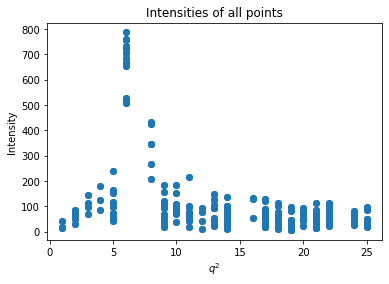

In [7]:
plt.plot(*zip(*intensities), 'o')
plt.xlabel('$q^2$')
plt.ylabel('Intensity')
plt.title('Intensities of all points')
plt.show()

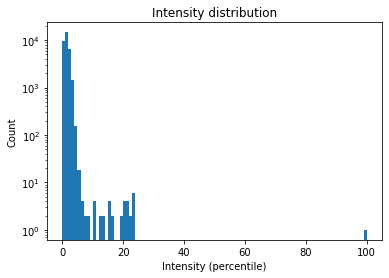

In [8]:
fd2 = (fd-np.min(fd))/(np.max(fd)-np.min(fd))*100 # normalize
plt.hist(fd2.ravel(), bins=100)
plt.title('Intensity distribution')
plt.xlabel('Intensity (percentile)')
plt.ylabel('Count')
plt.yscale('log')

In [9]:
%matplotlib notebook
%matplotlib notebook
# twice is necessary
import matplotlib.pyplot as plt # reload is necessary
from mpl_toolkits.mplot3d import Axes3D

In [10]:
lim=(4,30) # luma curve minimum and miximum
cutoff = 0.3 # set which points to index: only those with intensity > o will be labelled

<IPython.core.display.Javascript object>


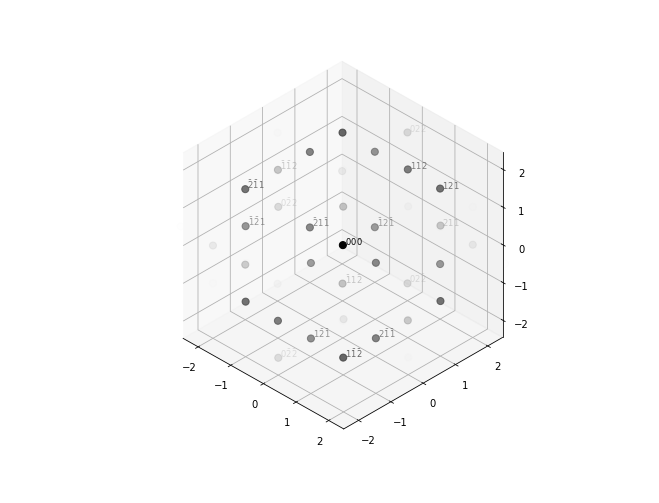

(-4.0, 4.0)

In [11]:
xs=[]; ys=[]; zs=[]; os=[]; ps=[]
for x in range(-4, 5):
    for y in range(-4, 5):
        for z in range(-4, 5):
            i = fd2[center[0]+x, center[1]+y, center[2]+z]
            o = (i-lim[0])/(lim[1]-lim[0]) # normalize to [0,1] according to the luma curve
            o = max(0, min(1, o)) # clip to [0,1]
            if o !=0:
                xs.append(x); ys.append(y); zs.append(z); os.append(i)
                ps.append((1-o, 1-o, 1-o, o))
fig = plt.figure()
plt.tight_layout()
ax = fig.gca(projection='3d',proj_type = 'ortho')
ax.set_box_aspect([1,1,1])
points = ax.scatter(xs, ys, zs, c=ps, s=50, depthshade=False)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)

**You should be able to interact with the 3d plot (e.g. drag, save, etc.). Running codes below will make changes to the figure above rather than creating new ones. Click the power button at the top right corner and use %matplotlib inline to restore.**

In [12]:
texts = []
print('These indices are labelled')
for i,p in enumerate(ps):
    if p[3] < cutoff: continue
    x = xs[i]
    y = ys[i]
    z = zs[i]

    if x*y*z<0: continue # show labels in only 1st, 3rd, 5th, 7th octants
    # comment out the line above to show all labels

    print(x,y,z)
    a = (' $%s%s%s$'%(x,y,z)).replace('-','\\bar') # replace negative numbers with \bar number
    t = ax.text(x, y, z, a, size='small', zorder=-1, color=p)
    texts.append(t)

These indices are labelled
-2 -1 1
-2 1 -1
-1 -2 1
-1 -1 2
-1 1 -2
-1 2 -1
0 -2 -2
0 -2 2
0 0 0
0 2 -2
0 2 2
1 -2 -1
1 -1 -2
1 1 2
1 2 1
2 -1 -1
2 1 1


## Change settings of or add elements to the 3d plot

In [ ]:
for i in range(len(texts)):
    texts.pop().remove()
# clear all labels
# use `texts.pop(i).remove()` to specifically remove the i-th label

In [ ]:
ax._axis3don = False # turn off axes
plt.draw() # refresh

In [ ]:
# Change luma curve of the points
# However, if the point intensity was zero (i.e. fd2[xyz] < lim[0]), it will not be taken into account as it was discarded
lim=(8, 50) # luma curve new minimum and miximum
for x, i in enumerate(os):
    o = (i-lim[0])/(lim[1]-lim[0])
    o = max(0, min(1, o))
    points._facecolor3d[x] = (1-o, 1-o, 1-o, o) # this is necessary if you use a low version of matplotlib
points.set_color(points._facecolor3d) # https://github.com/matplotlib/matplotlib/issues/13035

In [ ]:
line = plt.plot((0,1),(0,1),(0,1)) # draw a (1,1,1) guideline

In [ ]:
line[0].set_visible(False) # hide the line above